We let the number of pixel values in the target image be L and the pixel value be l (0<=l<=L-1).

The gray-level histogram is an analysis tool that examines the distribution of pixel values in an input image.
A grey level histogram indicates how many pixels of an image share the same grey level. The x-axis shows the grey levels (e.g. from 0 to 255), the y-axis shows their frequency in the image. 

Gray-level histogram presents the frequency of l . We let the probability of l be P(l), and from P(l) , we obtain the following seven features.  

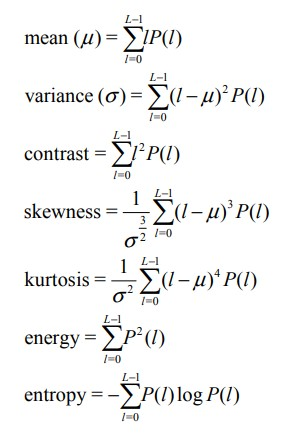


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
  

def image_show(path) :
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  from google.colab.patches import cv2_imshow
  cv2_imshow(img)

def plot_hist(path) :
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  dst = cv2.calcHist(img, [0], None, [256], [0,256])
  fig = plt.figure()
  a1 = fig.add_axes([0,0,1,1])
  plt.hist(img.ravel(),256,[0,256])
  a1.set_ylim(0,3000)
  plt.title('Histogram for gray scale image')
  plt.show()

def arr(path) :
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  dst = cv2.calcHist(img, [0], None, [256], [0,256])

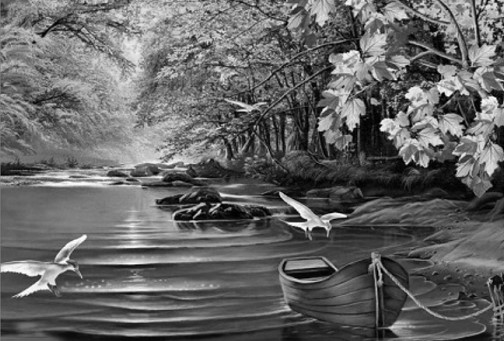

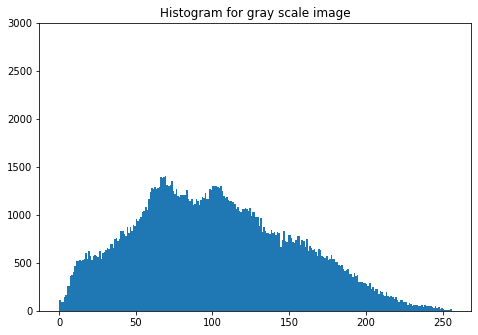

In [2]:
image_show('original.jpg')
plot_hist('original.jpg')

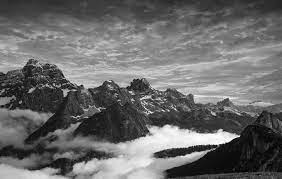

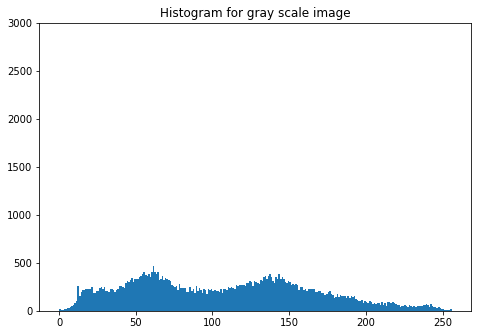

In [3]:
image_show('test image.jpg')
plot_hist('test image.jpg')

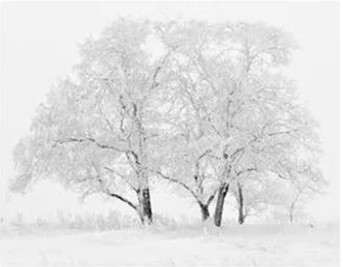

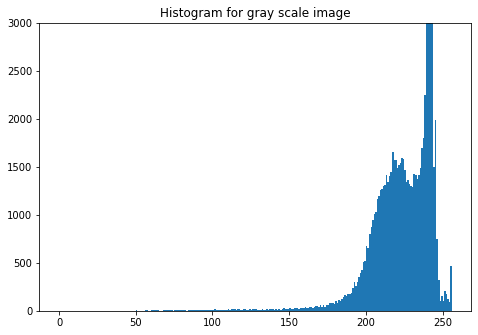

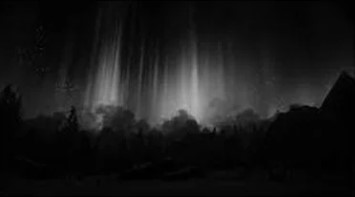

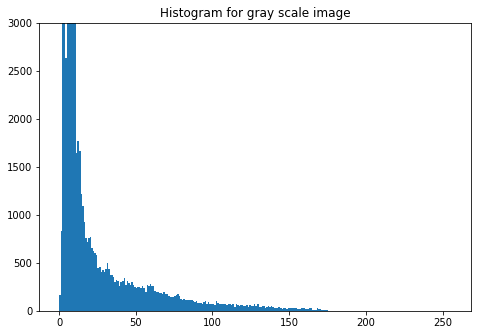

In [4]:
#image brightness: If the histogram values are concentrated toward the left, the image is darker. If they are concentrated toward the right, the image is lighter
image_show('bright image.jpg')
plot_hist('bright image.jpg')

image_show('dark image.jpg')
plot_hist('dark image.jpg')

In [5]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#finding out mean

import mahotas

def img_mean(path) :
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  mean = img.mean()
  print(str(mean))

img_mean('original.jpg')

100.95515640273705


In [7]:
#finding out variance

from PIL import Image, ImageStat

def img_variance(path) :
  im = Image.open(path)
  stat = ImageStat.Stat(im)
  print(stat.var)

img_variance('original.jpg')

[2635.963002085346, 2635.963002085346, 2635.963002085346]


51.34163030217628
14.306443440770792


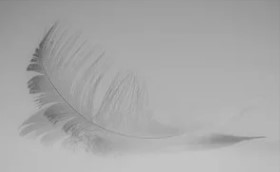

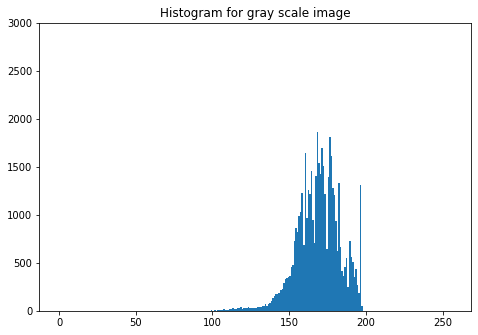

In [8]:
#finding out contrast
def contrast(path) :
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  x= img.std()
  print(x)
# If the histogram is biased toward higher, contrast shows higher.

contrast('original.jpg')
contrast('low contrast.jpg')

image_show('low contrast.jpg')
plot_hist('low contrast.jpg')

In [9]:
#finding out skewness

from scipy.stats import skew

def img_skew(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  dst = cv2.calcHist(img, [0], None, [256], [0,256])
  print(skew(dst))

img_skew('original.jpg')
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
# If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. 
# If the skewness is less than -1 or greater than 1, the data are highly skewed.
# If the histogram is asymmetric, skewness becomes higher.

[1.0470178]


In [10]:
#finding out kurtosis

from scipy.stats import kurtosis

def img_kurtosis(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  dst = cv2.calcHist(img, [0], None, [256], [0,256])
  print(kurtosis(dst))

img_kurtosis('original.jpg')

# Kurtosis near to 0 shows nearly normal distribution.
# Kurtosis shows how much the histogram is concentrated around μ .

[0.41868734]


In [11]:
#finding out entropy

from scipy.stats import entropy

def img_entropy(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  dst = cv2.calcHist(img, [0], None, [256], [0,256])
  print(entropy(dst))

img_entropy('original.jpg')

# The larger a particular P(l) is, the larger the energy; conversely, entropy takes on a larger value the larger the various P(l) are.

[4.973801]


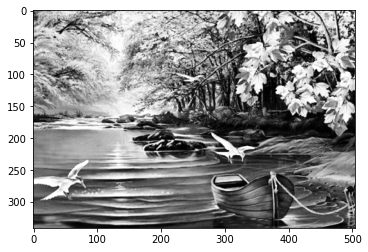

In [12]:
#image equalisation

def equal_img(path) :
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  eq_img = cv2.equalizeHist(img)
  plt.imshow(eq_img, cmap='gray')
  plt.show()

equal_img('original.jpg')